### First neural network in keras
We will use simple data of mobile price range classifier. The dataset consists of 20 features and we need to predict the price range in which phone lies. These ranges are divided into 4 classes.
<br>
Link to dataset - https://www.kaggle.com/iabhishekofficial/mobile-price-classification 
<br>
Link to blog -


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#dataset import
dataset = pd.read_csv('data/train.csv')
dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [2]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [3]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

#One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])

#Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('Normalized data:')
print(X_train[0])
print(X_test[0])

One hot encoded array:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Normalized data:
[-0.5390358   1.02589061 -1.26199175 -1.01793865  1.78495109 -1.0327585
  1.70200842  0.69159324  1.11448677  1.5240457   1.34736843  1.98951834
  1.16224611  1.51509727 -0.32332484 -1.09870945 -0.73208384 -1.77142063
 -1.00333891  0.99115027]
[ 0.49007136  1.02589061 -1.26199175  0.98237747 -0.758373   -1.0327585
  0.11029193  0.69159324 -1.61046602 -0.23362354 -1.13465024 -0.89856997
 -0.51391173  1.21460218 -1.27622653 -0.18407099 -1.09746604  0.56451866
  0.9966722  -1.00892875]


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense

2023-11-26 16:30:45.068078: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-26 16:30:45.122120: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

2023-11-26 16:30:47.312485: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: UNKNOWN ERROR (100)


In [6]:
#To visualize neural network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X, y, epochs=100, batch_size=64)

Epoch 1/100


32/32 [==============================] - 1s 3ms/step - loss: 226.6462 - accuracy: 0.2255
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 64.7195 - accuracy: 0.3305
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 42.0689 - accuracy: 0.3615
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 31.1793 - accuracy: 0.4215
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 23.2212 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 17.4432 - accuracy: 0.4620
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 13.9453 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 12.0224 - accuracy: 0.4915
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 10.2798 - accuracy: 0.4785
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 8.6972 - accuracy: 0.4950
Epoch 11/10

In [9]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

7/7 [==============================] - 0s 2ms/step


In [10]:
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [11]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 21.5


In [12]:
#Using test data as validation data.
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
21/29 [====================>.........] - ETA: 0s - loss: 1.7680 - accuracy: 0.2604

29/29 [==============================] - 0s 11ms/step - loss: 1.7193 - accuracy: 0.2644 - val_loss: 1.6326 - val_accuracy: 0.2300
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 1.4492 - accuracy: 0.2994 - val_loss: 1.3974 - val_accuracy: 0.3450
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 1.2729 - accuracy: 0.3767 - val_loss: 1.2510 - val_accuracy: 0.4150
Epoch 4/100
29/29 [==============================] - 0s 6ms/step - loss: 1.1105 - accuracy: 0.4822 - val_loss: 1.0713 - val_accuracy: 0.4950
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 0.9564 - accuracy: 0.5744 - val_loss: 0.9102 - val_accuracy: 0.6400
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.8300 - accuracy: 0.6594 - val_loss: 0.7801 - val_accuracy: 0.7250
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.7318 - accuracy: 0.7194 - val_loss: 0.6813 - val_accuracy: 0.7700
Epoch 8/100
29/29 [=====

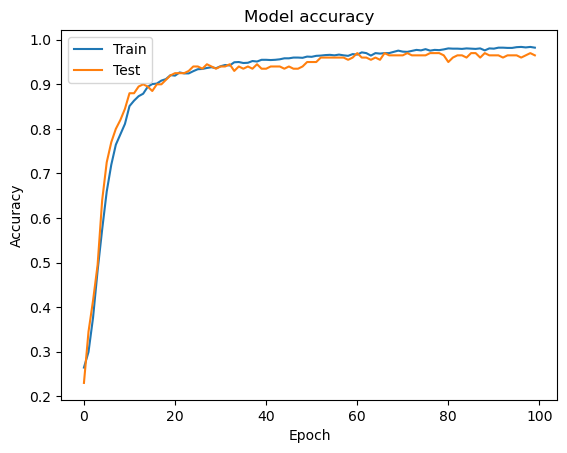

In [13]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

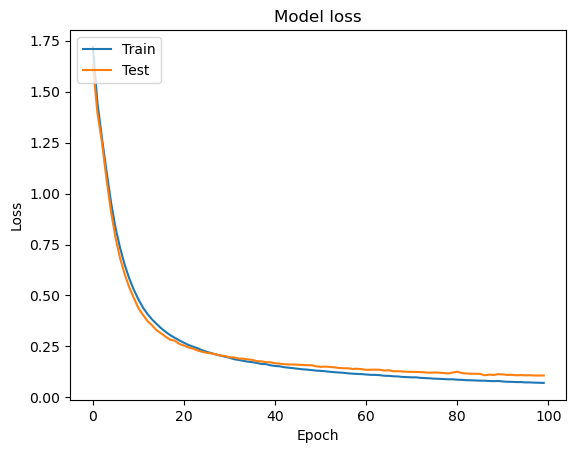

In [15]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()